<a href="https://colab.research.google.com/github/DaDupe01/BAN6800BusinessAnalytics_Milestone1/blob/main/BAN6800BusinessAnalyticsMilestone1DawoduM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('bankcustomer4monthtransaction.csv')

Saving bankcustomer4monthtransaction.csv to bankcustomer4monthtransaction (1).csv


/tmp/ipython-input-3918433387.py:8: DtypeWarning: Columns (0,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bankcustomer4monthtransaction.csv')


In [16]:
# Display initial information
print("Initial Data Info:")
print(df.info())
print("\nInitial Data Head:")
print(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69019 entries, 0 to 69018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TRAN_DATE           64692 non-null  object 
 1   CUSTOMER_ID         69019 non-null  object 
 2   TRANSACTION_REMARK  64692 non-null  object 
 3    AMOUNT             64692 non-null  object 
 4   Unnamed: 4          0 non-null      float64
 5   Unnamed: 5          0 non-null      float64
 6   Unnamed: 6          0 non-null      float64
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
 13  Unnamed: 13         0 non-null      float64
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         0 non-null    

In [17]:
# Drop all unnamed columns
df_clean = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)

# Drop rows where ' AMOUNT ' is missing, as they contain no useful data
df_clean.dropna(subset=[' AMOUNT '], inplace=True)

# Clean the ' AMOUNT ' column by removing quotes, commas, and converting to a numeric type
df_clean.rename(columns={' AMOUNT ': 'AMOUNT'}, inplace=True)
df_clean['AMOUNT'] = df_clean['AMOUNT'].str.replace('"', '').str.replace(',', '').astype(float)

# Convert TRAN_DATE to datetime objects
df_clean['TRAN_DATE'] = pd.to_datetime(df_clean['TRAN_DATE'], format='%d-%b-%y', errors='coerce')

# Extract month
df_clean['month'] = df_clean['TRAN_DATE'].dt.to_period('M')

# Create a boolean column to identify salary transactions
keywords = ['salary', 'sal', 'dilstaff', 'payroll', 'wages']
df_clean['Is_Salary'] = df_clean['TRANSACTION_REMARK'].str.lower().str.contains('|'.join(keywords), na=False)

# Remove the 'RTL' suffix from CUSTOMER_ID
df_clean['CUSTOMER_ID'] = df_clean['CUSTOMER_ID'].str.replace('RTL', '')


print("\nCleaned Data Info:")
print(df_clean.info())
print("\nCleaned Data Head:")
print(df_clean.head())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 64692 entries, 0 to 64691
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TRAN_DATE           64692 non-null  datetime64[ns]
 1   CUSTOMER_ID         64692 non-null  object        
 2   TRANSACTION_REMARK  64692 non-null  object        
 3   AMOUNT              64692 non-null  float64       
 4   month               64692 non-null  period[M]     
 5   Is_Salary           64692 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2), period[M](1)
memory usage: 3.0+ MB
None

Cleaned Data Head:
   TRAN_DATE  CUSTOMER_ID         TRANSACTION_REMARK       AMOUNT    month  \
0 2024-10-24  C_106630397  1054850016DILSTAFFSALARIE  19398779.25  2024-10   
1 2024-10-24   C_52188263  1054850015DILSTAFFSALARIE  14327691.97  2024-10   
2 2024-10-24    C_6904606      STAFF SALARY OCT 2024  13163255.25  2024-10  

In [18]:
# Filter the DataFrame to include only salary transactions
salary_transactions = df_clean[df_clean['Is_Salary'] == True].copy()

# Display the first 5 rows of the salary_transactions DataFrame
print("Salary Transactions Head:")
display(salary_transactions.head())

# Print the number of rows in the salary_transactions DataFrame
print("\nNumber of salary transactions:", salary_transactions.shape[0])

Salary Transactions Head:


,TRAN_DATE,CUSTOMER_ID,TRANSACTION_REMARK,AMOUNT,month,Is_Salary
0,2024-10-24,C_106630397,1054850016DILSTAFFSALARIE,19398779.25,2024-10,True
1,2024-10-24,C_52188263,1054850015DILSTAFFSALARIE,14327691.97,2024-10,True
2,2024-10-24,C_6904606,STAFF SALARY OCT 2024,13163255.25,2024-10,True
3,2024-10-29,C_38332985,STAFF SALARY OCT 2024,10557607.63,2024-10,True
4,2024-10-25,C_17730243,STAFF SALARY FOR OCTOBER,10289437.81,2024-10,True



Number of salary transactions: 64575


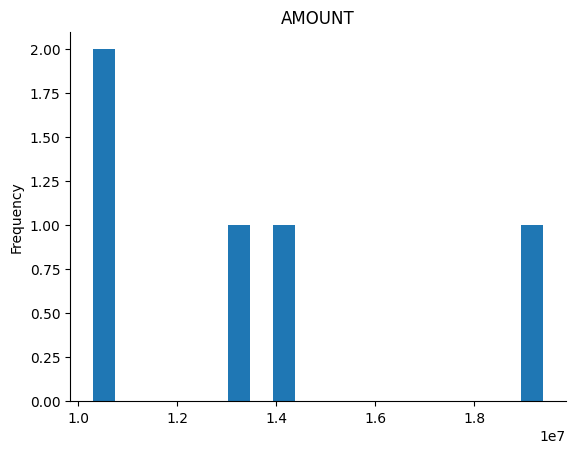

In [19]:
from matplotlib import pyplot as plt
_df_0['AMOUNT'].plot(kind='hist', bins=20, title='AMOUNT')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
# Group by CUSTOMER_ID and month and sum the AMOUNT
monthly_salary = salary_transactions.groupby(['CUSTOMER_ID', 'month'])['AMOUNT'].sum().reset_index()

# Display the first few rows and information of the monthly_salary DataFrame
print("Monthly Salary Inflow Head:")
display(monthly_salary.head())

print("\nMonthly Salary Inflow Info:")
print(monthly_salary.info())

Monthly Salary Inflow Head:


,CUSTOMER_ID,month,AMOUNT
0,C_1000042794,2024-10,53409.48
1,C_1000042794,2025-01,74217.18
2,C_1000059848,2024-11,64998.91
3,C_1000059848,2025-01,87531.97
4,C_1000066600,2024-11,106131.61



Monthly Salary Inflow Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64575 entries, 0 to 64574
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   CUSTOMER_ID  64575 non-null  object   
 1   month        64575 non-null  period[M]
 2   AMOUNT       64575 non-null  float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 1.5+ MB
None


In [21]:
# Group the monthly_salary DataFrame by CUSTOMER_ID and count the number of months
monthly_salary_counts = monthly_salary.groupby('CUSTOMER_ID')['month'].count().reset_index()
monthly_salary_counts.rename(columns={'month': 'month_count'}, inplace=True)

# Filter for customers who have a count equal to 4
consistent_customers = monthly_salary_counts[monthly_salary_counts['month_count'] == 4]

# Filter the monthly_salary DataFrame to include only the rows corresponding to the consistent customers
consistent_monthly_salary = monthly_salary[monthly_salary['CUSTOMER_ID'].isin(consistent_customers['CUSTOMER_ID'])]

# Display the first few rows of the consistent_monthly_salary DataFrame and its info
print("Consistent Monthly Salary Inflow Head:")
display(consistent_monthly_salary.head())

print("\nConsistent Monthly Salary Inflow Info:")
print(consistent_monthly_salary.info())

print("\nNumber of customers with consistent 4-month salary inflow:", consistent_customers.shape[0])

Consistent Monthly Salary Inflow Head:


,CUSTOMER_ID,month,AMOUNT



Consistent Monthly Salary Inflow Info:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   CUSTOMER_ID  0 non-null      object   
 1   month        0 non-null      period[M]
 2   AMOUNT       0 non-null      float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 0.0+ bytes
None

Number of customers with consistent 4-month salary inflow: 0


In [22]:
import matplotlib.pyplot as plt

if consistent_monthly_salary.empty:
    print("No customers with consistent 4-month salary inflow were found.")
else:
    # Create a histogram of the 'AMOUNT' column
    plt.figure(figsize=(10, 6))
    plt.hist(consistent_monthly_salary['AMOUNT'], bins=50, edgecolor='black')
    plt.title('Distribution of Monthly Salary for Consistent Customers')
    plt.xlabel('Monthly Salary Amount')
    plt.ylabel('Frequency')
    plt.show()

No customers with consistent 4-month salary inflow were found.


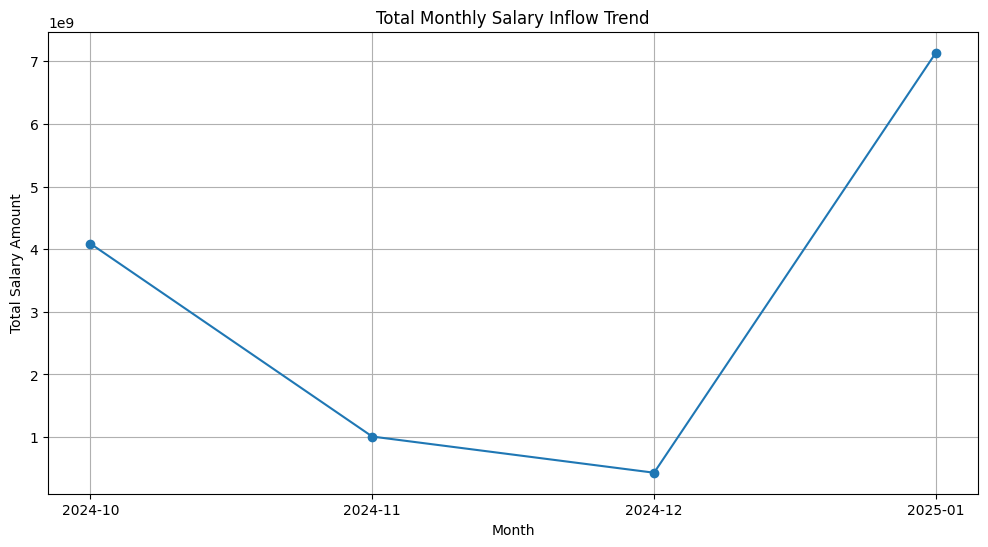

In [23]:
# Group by month and calculate the sum of the AMOUNT
monthly_total_salary = monthly_salary.groupby('month')['AMOUNT'].sum().reset_index()

# Sort by month
monthly_total_salary = monthly_total_salary.sort_values('month')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_total_salary['month'].astype(str), monthly_total_salary['AMOUNT'], marker='o')
plt.title('Total Monthly Salary Inflow Trend')
plt.xlabel('Month')
plt.ylabel('Total Salary Amount')
plt.grid(True)
plt.show()

In [24]:
# Group by CUSTOMER_ID and calculate the total salary inflow for each customer
total_salary_per_customer = monthly_salary.groupby('CUSTOMER_ID')['AMOUNT'].sum().reset_index()

# Sort in descending order by the total salary amount and select the top 10
top_10_customers = total_salary_per_customer.sort_values('AMOUNT', ascending=False).head(10)

# Display the top 10 customers and their total salary inflow
print("Top 10 Customers with Highest Total Salary Inflow:")
display(top_10_customers)

Top 10 Customers with Highest Total Salary Inflow:


,CUSTOMER_ID,AMOUNT
408,C_106630397,37288183.25
30274,C_6904606,30425230.25
28157,C_52188263,23761606.97
13514,C_17730243,20578875.81
21593,C_38332985,20494113.84
17563,C_24387162,17757872.80
30914,C_7527400,16880061.61
19353,C_271401387,15824415.75
19354,C_271403408,15824415.75
6510,C_13404236,15317574.93


In [25]:
# Display descriptive statistics of the new features
print("\nDescriptive Statistics of Customer Features:")
print(customer_data[['total_credit', 'total_debit', 'net_balance', 'num_transactions', 'avg_salary_amount']].describe())


Descriptive Statistics of Customer Features:
       total_credit  total_debit   net_balance  num_transactions  \
count  3.234600e+04      32346.0  3.234600e+04           32346.0   
mean   3.920825e+05          0.0  3.920825e+05               2.0   
std    7.355668e+05          0.0  7.355668e+05               0.0   
min    2.000000e+02          0.0  2.000000e+02               2.0   
25%    1.307868e+05          0.0  1.307868e+05               2.0   
50%    2.521340e+05          0.0  2.521340e+05               2.0   
75%    4.078320e+05          0.0  4.078320e+05               2.0   
max    3.728818e+07          0.0  3.728818e+07               2.0   

       avg_salary_amount  
count       3.234600e+04  
mean        1.960054e+05  
std         3.678018e+05  
min         0.000000e+00  
25%         6.535717e+04  
50%         1.260436e+05  
75%         2.038632e+05  
max         1.864409e+07  


In [26]:
# Create customer_data DataFrame by aggregating df_clean
customer_data = df_clean.groupby('CUSTOMER_ID').agg(
    total_credit=('AMOUNT', lambda x: x[x > 0].sum()),
    total_debit=('AMOUNT', lambda x: x[x < 0].sum()),
    net_balance=('AMOUNT', 'sum'),
    num_transactions=('TRAN_DATE', 'count')
).reset_index()

# Calculate average salary amount for customers with salary transactions
avg_salary_amount = salary_transactions.groupby('CUSTOMER_ID')['AMOUNT'].mean().reset_index()
avg_salary_amount.rename(columns={'AMOUNT': 'avg_salary_amount'}, inplace=True)

# Merge average salary amount into customer_data
customer_data = pd.merge(customer_data, avg_salary_amount, on='CUSTOMER_ID', how='left')

# Fill NaN average salary with 0 for customers without salary transactions
customer_data['avg_salary_amount'] = customer_data['avg_salary_amount'].fillna(0)

print("Customer Data Head:")
display(customer_data.head())

print("\nCustomer Data Info:")
print(customer_data.info())

Customer Data Head:


,CUSTOMER_ID,total_credit,total_debit,net_balance,num_transactions,avg_salary_amount
0,C_1000042794,127626.66,0.0,127626.66,2,63813.330
1,C_1000059848,152530.88,0.0,152530.88,2,76265.440
2,C_1000066600,188700.25,0.0,188700.25,2,94350.125
3,C_1000074809,147112.12,0.0,147112.12,2,73556.060
4,C_1000082675,149516.35,0.0,149516.35,2,74758.175



Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32346 entries, 0 to 32345
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMER_ID        32346 non-null  object 
 1   total_credit       32346 non-null  float64
 2   total_debit        32346 non-null  float64
 3   net_balance        32346 non-null  float64
 4   num_transactions   32346 non-null  int64  
 5   avg_salary_amount  32346 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB
None


In [27]:
# Save the final DataFrame to a CSV file
customer_data.to_csv('cleaned_and_transformed_loan_bank_data.csv', index=False)
print("\nFinal dataset saved to cleaned_and_transformed_loan_bank_data.csv")


Final dataset saved to cleaned_and_transformed_loan_bank_data.csv
